In [1]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARIMA


In [50]:
overall = pd.read_csv('cleaned_overall.csv')

In [51]:
overall

post_date  count_id_indexed
0    2020-03-01            1.0000
1    2020-03-02            1.0100
2    2020-03-03            1.0223
3    2020-03-04            1.0461
4    2020-03-05            1.0582
..          ...               ...
562  2021-09-16            1.9723
563  2021-09-17            1.9826
564  2021-09-18            2.0087
565  2021-09-19            2.0763
566  2021-09-20            1.7846

[567 rows x 2 columns]

In [52]:
overall['post_date'] = pd.to_datetime(overall['post_date'])
overall.columns = ['ds', 'y']

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2021-10-01  2.299143    1.882000    2.750967
1 2021-11-01  2.469873    2.049808    2.900418
2 2021-12-01  2.635610    2.201437    3.111395


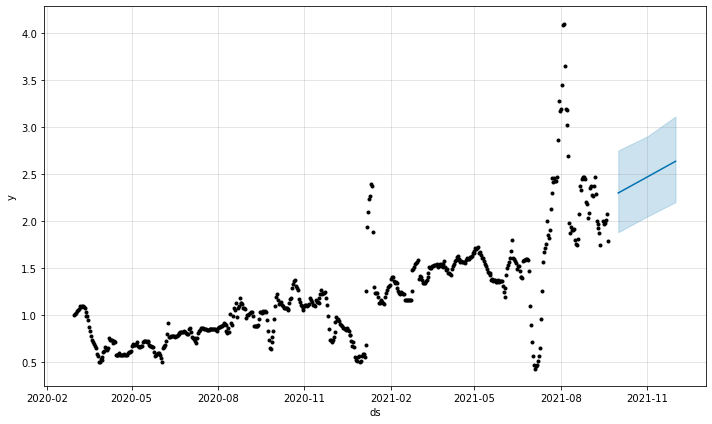

In [5]:
model = Prophet()
model.fit(overall)
# define the period for which we want a prediction
future = list()
for i in range(10, 13):
    date = '2021-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
ts_plot = model.plot(forecast)
pyplot.show()

In [6]:
ts_plot.savefig('Anya_Visualizations/time_series_forecast.png')

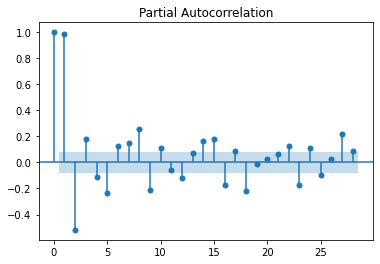

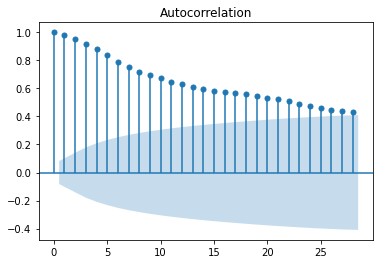

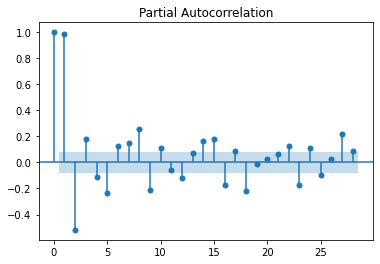

In [7]:
sm.graphics.tsa.plot_acf(overall['y'].values.squeeze())
sm.graphics.tsa.plot_pacf(overall['y'].values.squeeze())

In [8]:
mod = sm.tsa.arima.ARIMA(overall['y'], order=(1,1,2))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  567
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 589.098
Date:                Sat, 28 May 2022   AIC                          -1170.195
Time:                        13:13:00   BIC                          -1152.841
Sample:                             0   HQIC                         -1163.422
                                - 567                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8886      0.024    -37.719      0.000      -0.935      -0.842
ma.L1          1.5132      0.021     71.579      0.000       1.472       1.555
ma.L2          0.6604      0.016     40.651      0.0

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_mod

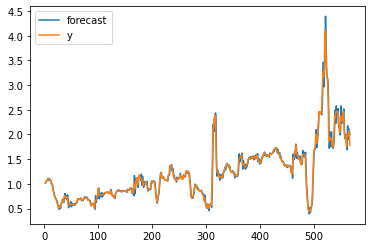

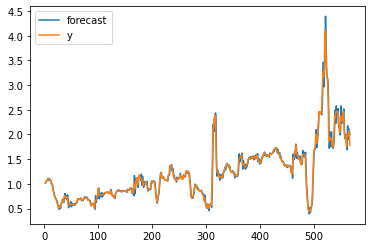

In [9]:
arima_model = ARIMA(overall['y'], order = (1,1,2))
model = arima_model.fit()
model.plot_predict(dynamic=False)

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [48]:
dta.reset_index()

ds       y
0   2020-03-01  1.0000
1   2020-03-02  1.0100
2   2020-03-03  1.0223
3   2020-03-04  1.0461
4   2020-03-05  1.0582
..         ...     ...
562 2021-09-16  1.9723
563 2021-09-17  1.9826
564 2021-09-18  2.0087
565 2021-09-19  2.0763
566 2021-09-20  1.7846

[567 rows x 2 columns]

In [54]:
dta

ds       y
0   2020-03-01  1.0000
1   2020-03-02  1.0100
2   2020-03-03  1.0223
3   2020-03-04  1.0461
4   2020-03-05  1.0582
..         ...     ...
562 2021-09-16  1.9723
563 2021-09-17  1.9826
564 2021-09-18  2.0087
565 2021-09-19  2.0763
566 2021-09-20  1.7846

[567 rows x 2 columns]

In [57]:
import numpy as np

In [59]:
dta

ds       y
0   2020-03-01  1.0000
1   2020-03-02  1.0100
2   2020-03-03  1.0223
3   2020-03-04  1.0461
4   2020-03-05  1.0582
..         ...     ...
562 2021-09-16  1.9723
563 2021-09-17  1.9826
564 2021-09-18  2.0087
565 2021-09-19  2.0763
566 2021-09-20  1.7846

[567 rows x 2 columns]

In [58]:
np.asarray(dta)

array([[Timestamp('2020-03-01 00:00:00'), 1.0],
       [Timestamp('2020-03-02 00:00:00'), 1.01],
       [Timestamp('2020-03-03 00:00:00'), 1.0223],
       ...,
       [Timestamp('2021-09-18 00:00:00'), 2.0087],
       [Timestamp('2021-09-19 00:00:00'), 2.0763],
       [Timestamp('2021-09-20 00:00:00'), 1.7846]], dtype=object)

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




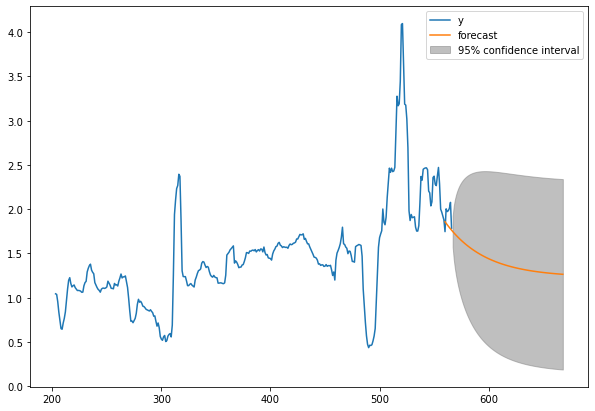

In [154]:
dta = overall['y'].astype(float)
res = sm.tsa.ARMA(dta, (1, 1, 2)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2020-03-01 00:00:00':].plot(ax=ax)
fig = res.plot_predict(560, 668, dynamic=True, ax=ax,
                       plot_insample=False)
plt.show()
plt.rcParams["figure.figsize"] = (10,7)

In [161]:
! pip install mpld3

     |████████████████████████████████| 201 kB 1.3 MB/s eta 0:00:01


In [162]:
#fig.write_html('Anya_Visualizations/arima_model.html')
import mpld3
mpld3.save_html(fig,'Anya_Visualizations/arima_model.html')

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/mpld3/mplexporter/utils.py:68: UserWarning:

line style '(0.0, None)' not understood: defaulting to solid line.



In [78]:
overall

ds       y
0   2020-03-01  1.0000
1   2020-03-02  1.0100
2   2020-03-03  1.0223
3   2020-03-04  1.0461
4   2020-03-05  1.0582
..         ...     ...
562 2021-09-16  1.9723
563 2021-09-17  1.9826
564 2021-09-18  2.0087
565 2021-09-19  2.0763
566 2021-09-20  1.7846

[567 rows x 2 columns]

Text(0, 0.5, 'y')

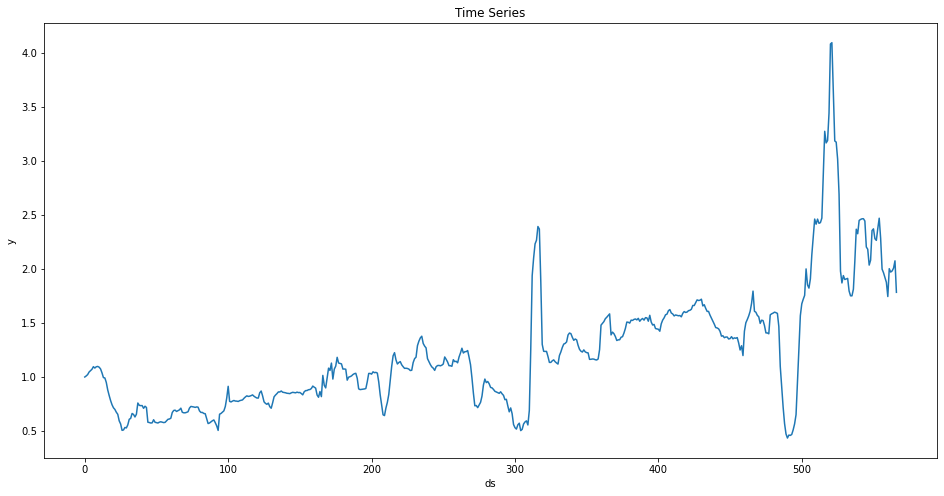

In [77]:
import matplotlib.pyplot as plt

overall['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

In [136]:
octt = '2021-10'
nov = '2021-11'
dec = '2021-12'
october = pd.DataFrame({
    'ds': pd.date_range(
        start = pd.Timestamp(octt),                        
        end = pd.Timestamp(octt) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
november = pd.DataFrame({
    'ds': pd.date_range(
        start = pd.Timestamp(nov),                        
        end = pd.Timestamp(nov) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
december = pd.DataFrame({
    'ds': pd.date_range(
        start = pd.Timestamp(dec),                        
        end = pd.Timestamp(dec) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test = pd.concat([october, november, december])
test

ds
0  2021-10-01
1  2021-10-02
2  2021-10-03
3  2021-10-04
4  2021-10-05
..        ...
26 2021-12-27
27 2021-12-28
28 2021-12-29
29 2021-12-30
30 2021-12-31

[92 rows x 1 columns]

In [138]:
X_train = overall.loc[overall["ds"]<"2021-09-01"]
X_val  = overall.loc[overall["ds"]>="2021-09-01"]
X_test = test.loc[test["ds"]>="2021-10-01"]

In [84]:
model = Prophet()
model.fit(X_train)
forecast = model.predict(X_val.drop(columns="y"))
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2021-09-01  2.157846    1.724357    2.615182     2.157846     2.157846   
1  2021-09-02  2.163335    1.725567    2.610641     2.163335     2.163335   
2  2021-09-03  2.168824    1.714141    2.609921     2.168824     2.168824   
3  2021-09-04  2.174313    1.694445    2.625723     2.174313     2.174313   
4  2021-09-05  2.179803    1.743552    2.647695     2.179792     2.179803   
5  2021-09-06  2.185292    1.728284    2.623398     2.185238     2.185310   
6  2021-09-07  2.190781    1.768022    2.647261     2.190629     2.190877   
7  2021-09-08  2.196271    1.749604    2.699268     2.196011     2.196438   
8  2021-09-09  2.201760    1.746871    2.646862     2.201398     2.201996   
9  2021-09-10  2.207249    1.750013    2.671295     2.206780     2.207552   
10 2021-09-11  2.212738    1.737712    2.677252     2.212118     2.213151   
11 2021-09-12  2.218228    1.775826    2.680301     2.217430     2.218764   
12 2021-09-15  2.234695    1.763577    2.657071     2.233546     2.235735   
13 2021-09-16  2.240185    1.774656    2.710627     2.238833     2.241411   
14 2021-09-17  2.245674    1.808839    2.699117     2.244165     2.247062   
15 2021-09-18  2.251163    1.767370    2.694224     2.249435     2.252716   
16 2021-09-19  2.256653    1.793564    2.720596     2.254615     2.258393   
17 2021-09-20  2.262142    1.802149    2.731519     2.259884     2.264060   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        -0.000331             -0.000331             -0.000331 -0.000331   
1        -0.000069             -0.000069             -0.000069 -0.000069   
2         0.001295              0.001295              0.001295  0.001295   
3         0.000861              0.000861              0.000861  0.000861   
4         0.002410              0.002410              0.002410  0.002410   
5        -0.001466             -0.001466             -0.001466 -0.001466   
6        -0.002699             -0.002699             -0.002699 -0.002699   
7        -0.000331             -0.000331             -0.000331 -0.000331   
8        -0.000069             -0.000069             -0.000069 -0.000069   
9         0.001295              0.001295              0.001295  0.001295   
10        0.000861              0.000861              0.000861  0.000861   
11        0.002410              0.002410              0.002410  0.002410   
12       -0.000331             -0.000331             -0.000331 -0.000331   
13       -0.000069             -0.000069             -0.000069 -0.000069   
14        0.001295              0.001295              0.001295  0.001295   
15        0.000861              0.000861              0.000861  0.000861   
16        0.002410              0.002410              0.002410  0.002410   
17       -0.001466             -0.001466             -0.001466 -0.001466   

    weekly_lower  weekly_upper  multiplicative_terms  \
0      -0.000331     -0.000331                   0.0   
1      -0.000069     -0.000069                   0.0   
2       0.001295      0.001295                   0.0   
3       0.000861      0.000861                   0.0   
4       0.002410      0.002410                   0.0   
5      -0.001466     -0.001466                   0.0   
6      -0.002699     -0.002699                   0.0   
7      -0.000331     -0.000331                   0.0   
8      -0.000069     -0.000069                   0.0   
9       0.001295      0.001295                   0.0   
10      0.000861      0.000861                   0.0   
11      0.002410      0.002410                   0.0   
12     -0.000331     -0.000331                   0.0   
13     -0.000069     -0.000069                   0.0   
14      0.001295      0.001295                   0.0   
15      0.000861      0.000861                   0.0   
16      0.002410      0.002410                   0.0   
17     -0.001466     -0.001466                   0.0   

    multiplicative_terms_lower  multi

In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

0.26475631811287065


In [86]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

<ipython-input-86-8a6cbba89dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast.yhat[forecast.yhat < 0] = 0


actual  predicted
0   2.3570          2
1   2.3725          2
2   2.2815          2
3   2.2660          2
4   2.3750          2
5   2.4712          2
6   2.2839          2
7   1.9995          2
8   1.9662          2
9   1.9229          2
10  1.8773          2
11  1.7456          2
12  2.0035          2
13  1.9723          2
14  1.9826          2
15  2.0087          2
16  2.0763          2
17  1.7846          2

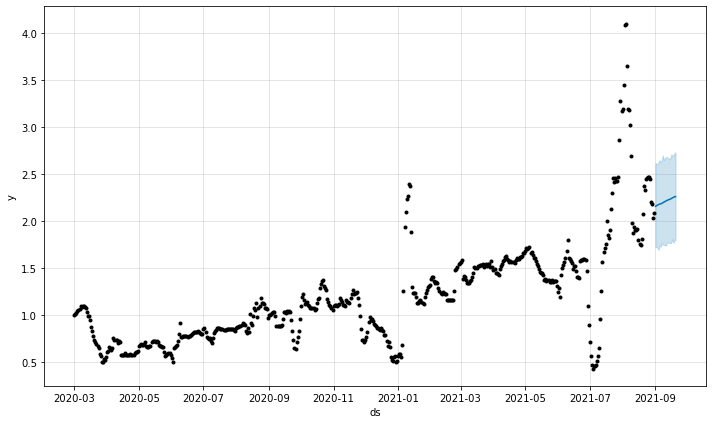

In [87]:
fig1 = model.plot(forecast)

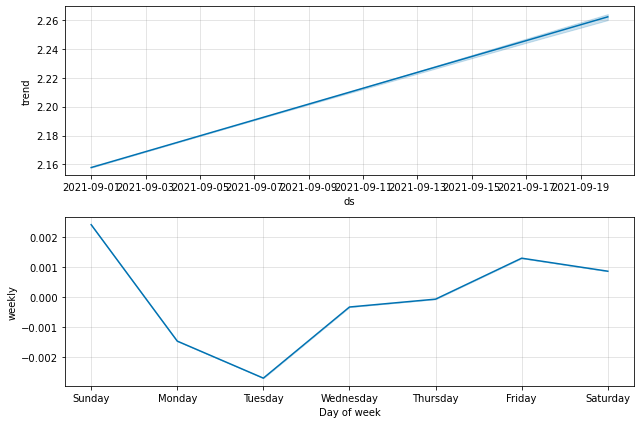

In [88]:
fig2 = model.plot_components(forecast)

In [89]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [90]:
plot_components_plotly(model, forecast)

In [139]:
prediction = model.predict(X_test)
prediction

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2021-10-01  2.322524    1.873122    2.808127     2.317526     2.327397   
1  2021-10-02  2.328013    1.854333    2.763566     2.322776     2.333185   
2  2021-10-03  2.333502    1.880045    2.763729     2.328054     2.338929   
3  2021-10-04  2.338992    1.859207    2.769427     2.333284     2.344728   
4  2021-10-05  2.344481    1.855682    2.786943     2.338493     2.350559   
..        ...       ...         ...         ...          ...          ...   
87 2021-12-27  2.800091    2.372611    3.249435     2.757219     2.844748   
88 2021-12-28  2.805580    2.331976    3.285158     2.762215     2.850956   
89 2021-12-29  2.811069    2.354891    3.266063     2.767203     2.856576   
90 2021-12-30  2.816559    2.342477    3.242725     2.772137     2.862574   
91 2021-12-31  2.822048    2.360887    3.326580     2.777154     2.868672   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         0.001295              0.001295              0.001295  0.001295   
1         0.000861              0.000861              0.000861  0.000861   
2         0.002410              0.002410              0.002410  0.002410   
3        -0.001466             -0.001466             -0.001466 -0.001466   
4        -0.002699             -0.002699             -0.002699 -0.002699   
..             ...                   ...                   ...       ...   
87       -0.001466             -0.001466             -0.001466 -0.001466   
88       -0.002699             -0.002699             -0.002699 -0.002699   
89       -0.000331             -0.000331             -0.000331 -0.000331   
90       -0.000069             -0.000069             -0.000069 -0.000069   
91        0.001295              0.001295              0.001295  0.001295   

    weekly_lower  weekly_upper  multiplicative_terms  \
0       0.001295      0.001295                   0.0   
1       0.000861      0.000861                   0.0   
2       0.002410      0.002410                   0.0   
3      -0.001466     -0.001466                   0.0   
4      -0.002699     -0.002699                   0.0   
..           ...           ...                   ...   
87     -0.001466     -0.001466                   0.0   
88     -0.002699     -0.002699                   0.0   
89     -0.000331     -0.000331                   0.0   
90     -0.000069     -0.000069                   0.0   
91      0.001295      0.001295                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                          0.0                         0.0  2.323818  
1                          0.0                         0.0  2.328874  
2                          0.0                         0.0  2.335913  
3                          0.0                         0.0  2.337525  
4                          0.0                         0.0  2.341782  
..                         ...                         ...       ...  
87                         0.0                         0.0  2.798624  
88                         0.0                         0.0  2.802881  
89                         0.0                         0.0  2.810738  
90                         0.0                         0.0  2.816489  
91                         0.0                         0.0  2.823343  

[92 rows x 16 columns]

In [140]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_cases': prediction.yhat.values.astype(int)})
output.to_csv('oct_predictions.csv', index=False)

<ipython-input-140-0b4a19a47e41>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
preds = pd.read_csv("oct_predictions.csv")
preds

date  new_cases
0   2021-10-01          2
1   2021-10-02          2
2   2021-10-03          2
3   2021-10-04          2
4   2021-10-05          2
..         ...        ...
87  2021-12-27          2
88  2021-12-28          2
89  2021-12-29          2
90  2021-12-30          2
91  2021-12-31          2

[92 rows x 2 columns]

In [142]:
df_out = forecast.append(prediction)
df_out

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2021-09-01  2.157846    1.724357    2.615182     2.157846     2.157846   
1  2021-09-02  2.163335    1.725567    2.610641     2.163335     2.163335   
2  2021-09-03  2.168824    1.714141    2.609921     2.168824     2.168824   
3  2021-09-04  2.174313    1.694445    2.625723     2.174313     2.174313   
4  2021-09-05  2.179803    1.743552    2.647695     2.179792     2.179803   
..        ...       ...         ...         ...          ...          ...   
87 2021-12-27  2.800091    2.372611    3.249435     2.757219     2.844748   
88 2021-12-28  2.805580    2.331976    3.285158     2.762215     2.850956   
89 2021-12-29  2.811069    2.354891    3.266063     2.767203     2.856576   
90 2021-12-30  2.816559    2.342477    3.242725     2.772137     2.862574   
91 2021-12-31  2.822048    2.360887    3.326580     2.777154     2.868672   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        -0.000331             -0.000331             -0.000331 -0.000331   
1        -0.000069             -0.000069             -0.000069 -0.000069   
2         0.001295              0.001295              0.001295  0.001295   
3         0.000861              0.000861              0.000861  0.000861   
4         0.002410              0.002410              0.002410  0.002410   
..             ...                   ...                   ...       ...   
87       -0.001466             -0.001466             -0.001466 -0.001466   
88       -0.002699             -0.002699             -0.002699 -0.002699   
89       -0.000331             -0.000331             -0.000331 -0.000331   
90       -0.000069             -0.000069             -0.000069 -0.000069   
91        0.001295              0.001295              0.001295  0.001295   

    weekly_lower  weekly_upper  multiplicative_terms  \
0      -0.000331     -0.000331                   0.0   
1      -0.000069     -0.000069                   0.0   
2       0.001295      0.001295                   0.0   
3       0.000861      0.000861                   0.0   
4       0.002410      0.002410                   0.0   
..           ...           ...                   ...   
87     -0.001466     -0.001466                   0.0   
88     -0.002699     -0.002699                   0.0   
89     -0.000331     -0.000331                   0.0   
90     -0.000069     -0.000069                   0.0   
91      0.001295      0.001295                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                          0.0                         0.0  2.157514  
1                          0.0                         0.0  2.163266  
2                          0.0                         0.0  2.170119  
3                          0.0                         0.0  2.175175  
4                          0.0                         0.0  2.182213  
..                         ...                         ...       ...  
87                         0.0                         0.0  2.798624  
88                         0.0                         0.0  2.802881  
89                         0.0                         0.0  2.810738  
90                         0.0                         0.0  2.816489  
91                         0.0                         0.0  2.823343  

[110 rows x 16 columns]

In [150]:
#fig1 = model.plot(df_out)
end_year_preds = plot_plotly(model, df_out)
end_year_preds.write_html("Anya_Visualizations/end_year_preds.html")

In [153]:
#fig2 = model.plot_components(df_out)
end_year_comps = plot_components_plotly(model, df_out)
end_year_comps.write_html('Anya_Visualizations/end_year_comps.html')

In [98]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from datetime import datetime

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_AR = AR(X_train.y)
model_fit_AR = model_AR.fit()
# make prediction
yhat = model_fit_AR.predict(start=start_index, end=end_index)
yhat = yhat.astype(int)
print(yhat)

549    2
550    2
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
dtype: int64


/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




In [99]:
df_val = pd.DataFrame({'Actual': X_val['y'], 'Predicted': yhat})
df_val

Actual  Predicted
549  2.3570          2
550  2.3725          2
551  2.2815          1
552  2.2660          1
553  2.3750          1
554  2.4712          1
555  2.2839          1
556  1.9995          1
557  1.9662          1
558  1.9229          1
559  1.8773          1
560  1.7456          1
561  2.0035          1
562  1.9723          1
563  1.9826          1
564  2.0087          1
565  2.0763          1
566  1.7846          1

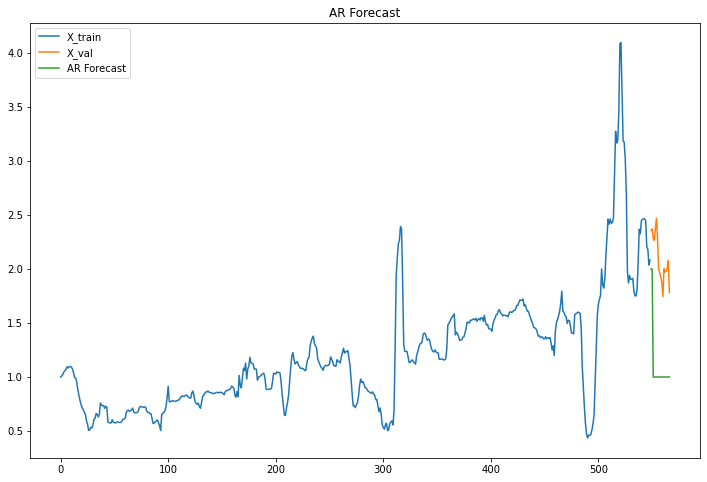

In [100]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='AR Forecast') 
plt.legend(loc='best') 
plt.title("AR Forecast") 
plt.show()

In [101]:
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

1.0283183613172637


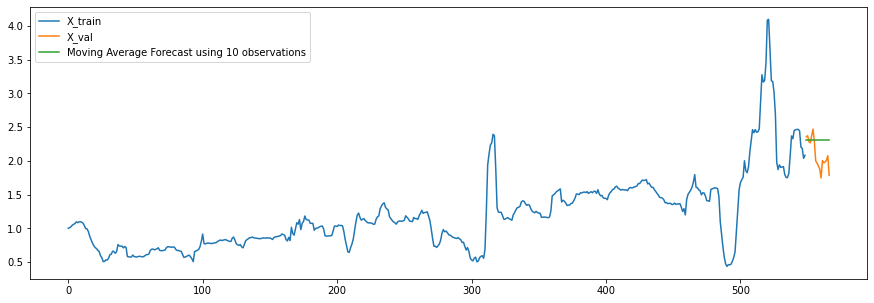

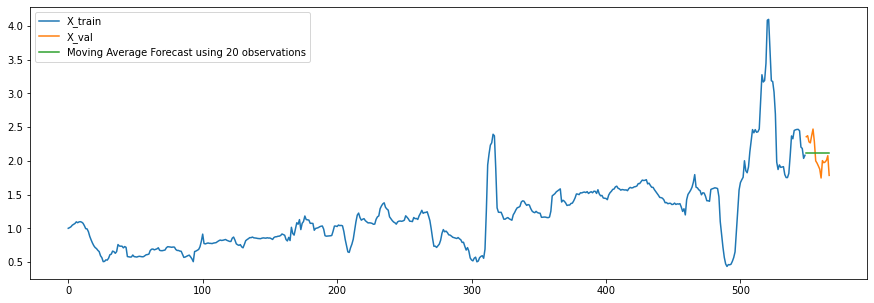

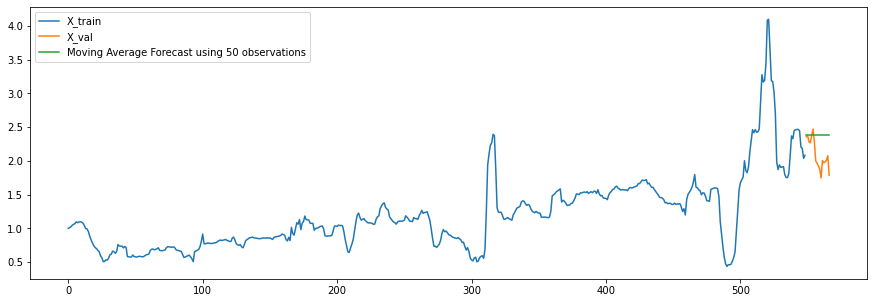

In [102]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [103]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

0.36266277014083237


In [104]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

     moving_avg_forecast
549                    2
550                    2
551                    2
552                    2
553                    2
554                    2
555                    2
556                    2
557                    2
558                    2
559                    2
560                    2
561                    2
562                    2
563                    2
564                    2
565                    2
566                    2


In [106]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_ARMA =ARMA(X_train.y, order=(2, 1))
model_fit_ARMA = model_ARMA.fit(disp=False)
# make prediction
yhat = model_fit_ARMA.predict(start=start_index, end=end_index, dynamic=False)
yhat = yhat.astype(int)
print(yhat)

549    2
550    2
551    2
552    2
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
dtype: int64


/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [107]:
df_val=pd.DataFrame({'Actual': X_val['y'].values, 'Predicted': yhat})
df_val

Actual  Predicted
549  2.3570          2
550  2.3725          2
551  2.2815          2
552  2.2660          2
553  2.3750          1
554  2.4712          1
555  2.2839          1
556  1.9995          1
557  1.9662          1
558  1.9229          1
559  1.8773          1
560  1.7456          1
561  2.0035          1
562  1.9723          1
563  1.9826          1
564  2.0087          1
565  2.0763          1
566  1.7846          1

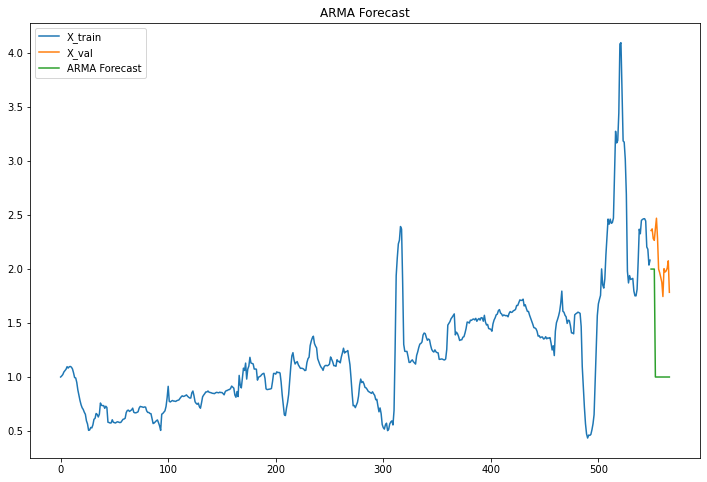

In [108]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='ARMA Forecast') 
plt.legend(loc='best') 
plt.title("ARMA Forecast") 
plt.show()

In [109]:
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

0.94100701792164


In [110]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_SES = SimpleExpSmoothing(X_train.y)
model_fit_SES = model_SES.fit(smoothing_level=0.6,optimized=False)
# make prediction
yhat = model_fit_SES.predict(start=start_index, end=end_index)
yhat = yhat.astype(int)

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



In [111]:
df_val=pd.DataFrame({'Actual': X_val['y'].values, 'Predicted': yhat})
df_val

Actual  Predicted
549  2.3570          2
550  2.3725          2
551  2.2815          2
552  2.2660          2
553  2.3750          2
554  2.4712          2
555  2.2839          2
556  1.9995          2
557  1.9662          2
558  1.9229          2
559  1.8773          2
560  1.7456          2
561  2.0035          2
562  1.9723          2
563  1.9826          2
564  2.0087          2
565  2.0763          2
566  1.7846          2

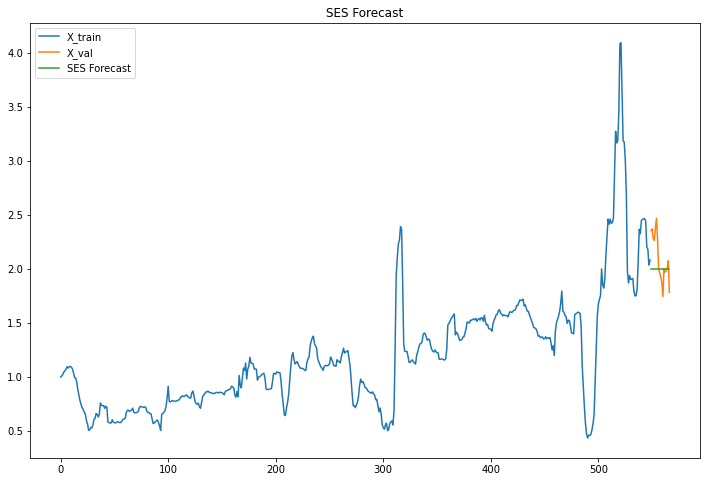

In [170]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='SES Forecast') 
plt.legend(loc='best') 
plt.title("SES Forecast") 
plt.show()

In [169]:
ses

In [113]:
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

0.23566640028273492


/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



<AxesSubplot:>

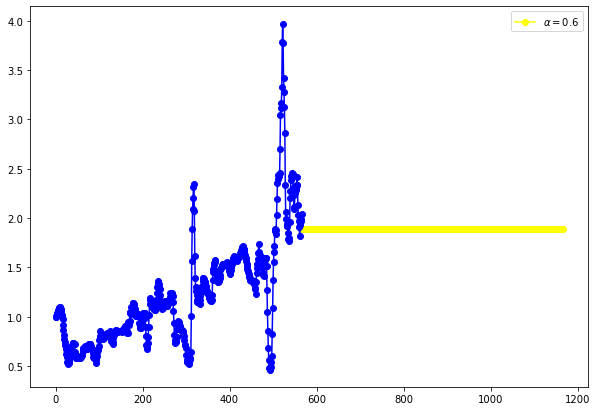

In [174]:
fit1 = SimpleExpSmoothing(overall['y']).fit(smoothing_level=0.6,optimized=False)
fcast1 = fit1.forecast(600).rename(r'$\alpha={}$'.format(0.6))
# specific smoothing level
fcast1.plot(marker='o', color='yellow', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

<ipython-input-114-9484160698d9>:5: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



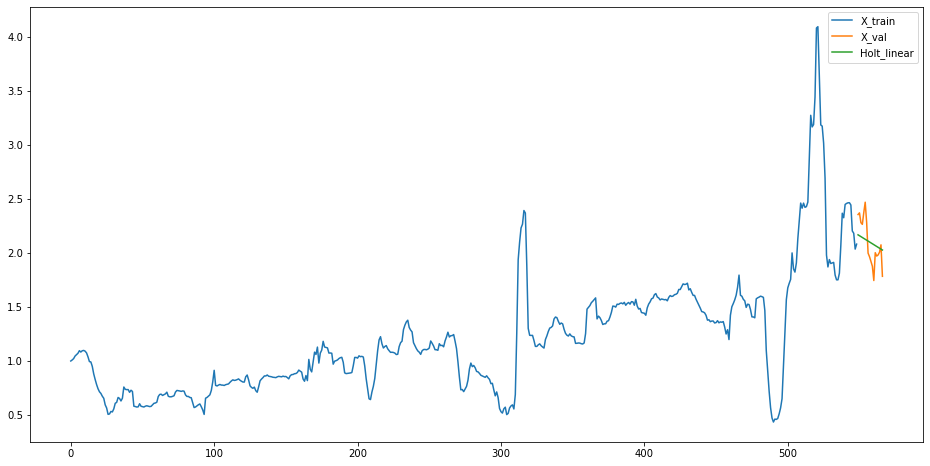

In [114]:
#holt's linear trend model
from statsmodels.tsa.api import Holt

y_hat_avg = X_val.copy() 
fit1 = Holt(np.asarray(X_train['y'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(X_val)) 
plt.figure(figsize=(16,8)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [115]:
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.Holt_linear)) 
print(rms)

0.18381937310514349


In [126]:
from statsmodels.tsa.api import Holt
fit1 = Holt(overall['y']).fit(0.6, 0.2, optimized=False)
fcast1 = fit1.forecast(600).rename("Holt's linear trend")
#mse1 = ((fcast1 - y_to_test) ** 2).mean()
#print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

<AxesSubplot:>

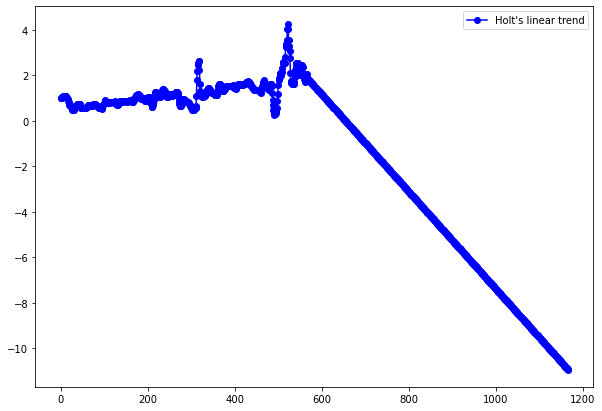

In [128]:
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)

In [116]:
y_hat_avg.Holt_linear = y_hat_avg.Holt_linear.astype(int)
y_hat_avg.Holt_linear

549    2
550    2
551    2
552    2
553    2
554    2
555    2
556    2
557    2
558    2
559    2
560    2
561    2
562    2
563    2
564    2
565    2
566    2
Name: Holt_linear, dtype: int64

In [117]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_HWES = ExponentialSmoothing(X_train.y)
model_fit_HWES = model_HWES.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# make prediction
yhat = model_fit_HWES.predict(start=start_index, end=end_index)
yhat = yhat.astype(int)
print(yhat)

549    2
550    2
551    2
552    2
553    2
554    2
555    2
556    2
557    2
558    2
559    2
560    2
561    2
562    2
563    2
564    2
565    2
566    2
dtype: int64


/Users/anyachandorkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

<ipython-input-117-03998f45d170>:8: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



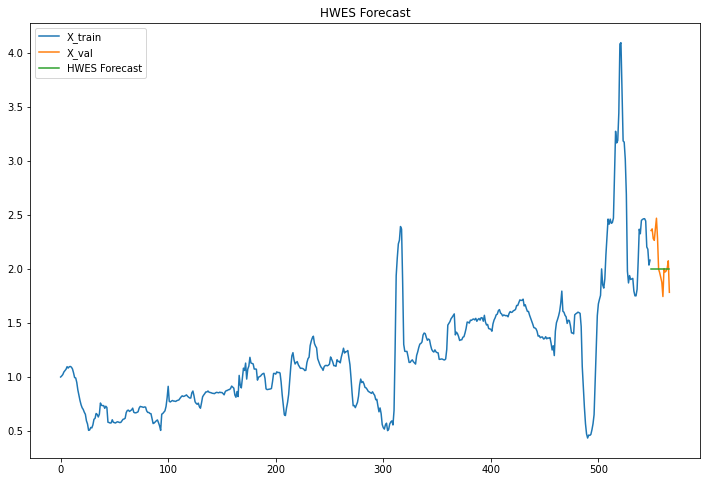

In [118]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='HWES Forecast') 
plt.legend(loc='best') 
plt.title("HWES Forecast") 
plt.show()

In [119]:
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

0.23566640028273492
